### EXERCICIO 1

![exercicio](<Exercicio 1.png>)

![alt text](<FLUXOGRAMA EXERCICIO 2.png>)

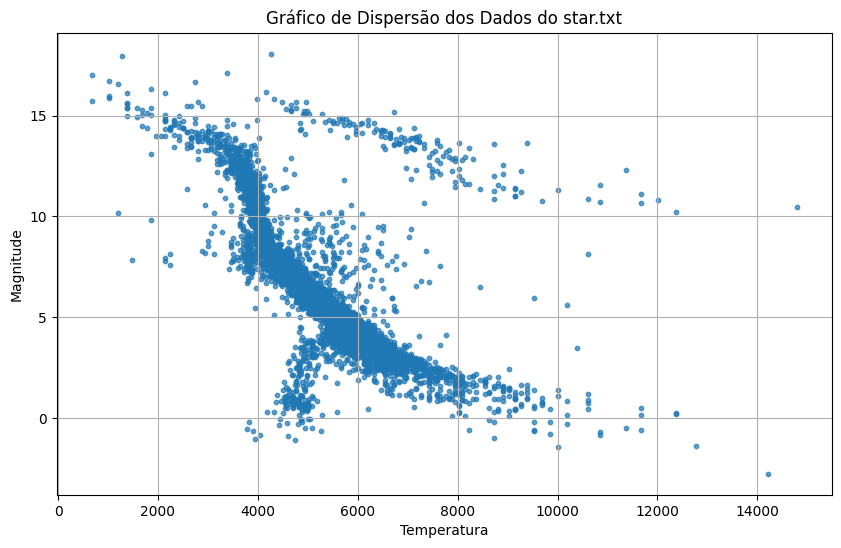

In [1]:
import matplotlib.pyplot as plt

# Carregar os dados do arquivo
x = []
y = []

with open("star.txt", "r") as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 2:
            try:
                x_val = float(parts[0])
                y_val = float(parts[1])
                x.append(x_val)
                y.append(y_val)
            except ValueError:
                continue  # Ignorar linhas com valores inválidos

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=10, alpha=0.7)
plt.title("Gráfico de Dispersão dos Dados do star.txt")
plt.xlabel("Temperatura")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


### EXERCICIO 2

![exercicio 2](<exexrcico 2.png>)

![alt text](<fluxograma exercicio 2 ..png>)

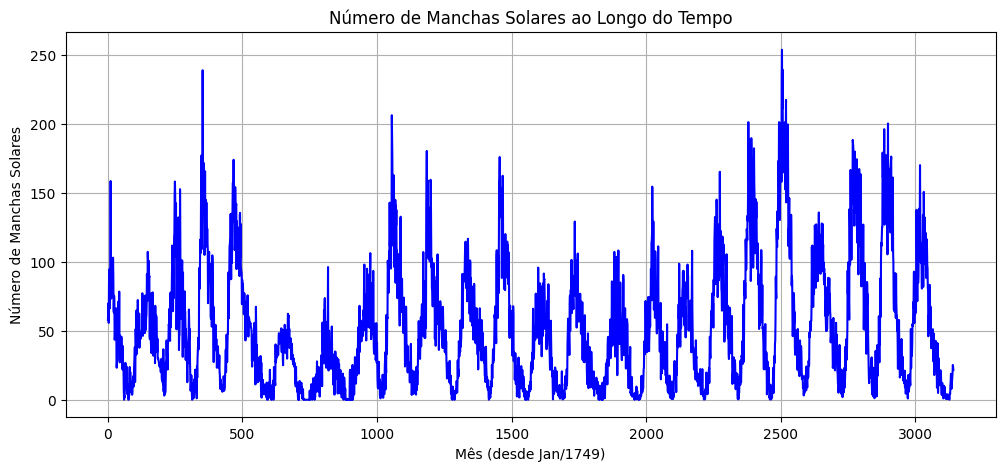

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parte (a)
# Carrega os dados do arquivo: primeira coluna = mês, segunda = manchas solares
dados = np.loadtxt("sunspots.txt")
meses = dados[:, 0]
manchas = dados[:, 1]

# Plotando o gráfico completo
plt.figure(figsize=(12, 5))
plt.plot(meses, manchas, color='blue')
plt.title("Número de Manchas Solares ao Longo do Tempo")
plt.xlabel("Mês (desde Jan/1749)")
plt.ylabel("Número de Manchas Solares")
plt.grid(True)
plt.show()


![alt text](<fluxograma exercicio 2 ..png>)

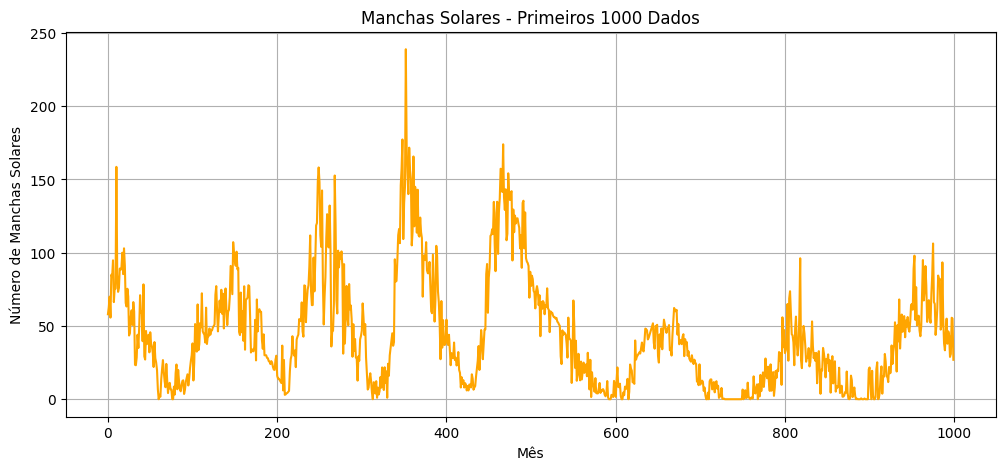

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parte (b)
dados = np.loadtxt("sunspots.txt")
meses = dados[:, 0]
manchas = dados[:, 1]

# Selecionar apenas os primeiros 1000 pontos
meses_1000 = meses[:1000]
manchas_1000 = manchas[:1000]

# Plotando gráfico dos primeiros 1000 pontos
plt.figure(figsize=(12, 5))
plt.plot(meses_1000, manchas_1000, color='orange')
plt.title("Manchas Solares - Primeiros 1000 Dados")
plt.xlabel("Mês")
plt.ylabel("Número de Manchas Solares")
plt.grid(True)
plt.show()


![alt text](<Fluxograma 2.1.png>)

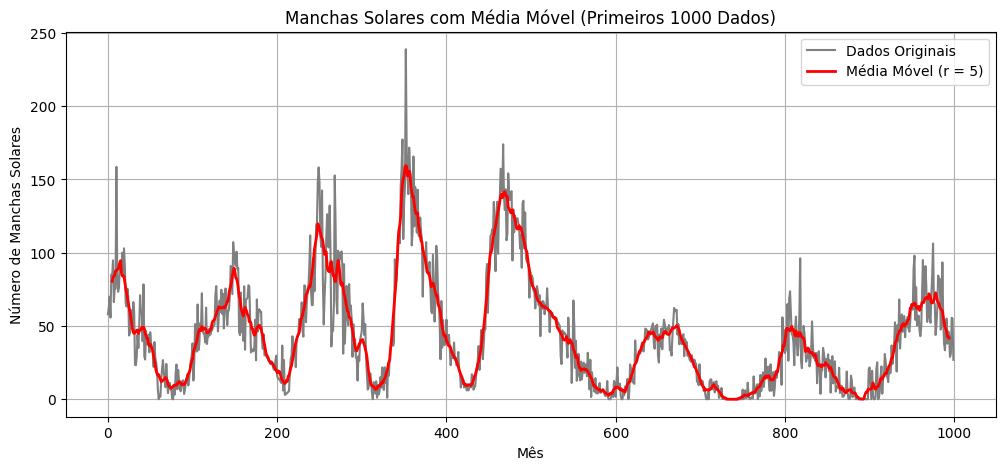

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parte (c)
dados = np.loadtxt("sunspots.txt")
meses = dados[:, 0]
manchas = dados[:, 1]

# Usar os primeiros 1000 pontos
meses_1000 = meses[:1000]
manchas_1000 = manchas[:1000]

# Parâmetro da média móvel
r = 5
media_movel = []

# Calcular a média móvel para os pontos onde a janela está completa
for k in range(len(manchas_1000)):
    if k >= r and k <= len(manchas_1000) - r - 1:
        media = np.mean(manchas_1000[k - r:k + r + 1])
    else:
        media = np.nan  # Para manter o tamanho do vetor, usar NaN nas bordas
    media_movel.append(media)

# Converter para array para facilitar plotagem
media_movel = np.array(media_movel)

# Plotar dados originais + média móvel
plt.figure(figsize=(12, 5))
plt.plot(meses_1000, manchas_1000, label='Dados Originais', color='gray')
plt.plot(meses_1000, media_movel, label='Média Móvel (r = 5)', color='red', linewidth=2)
plt.title("Manchas Solares com Média Móvel (Primeiros 1000 Dados)")
plt.xlabel("Mês")
plt.ylabel("Número de Manchas Solares")
plt.legend()
plt.grid(True)
plt.show()


Na parte (a), o objetivo é ler esse arquivo e plotar um gráfico completo mostrando a variação do número de manchas solares ao longo do tempo. Isso nos permite visualizar os ciclos solares e padrões de atividade solar ao longo de centenas de anos.

Na parte (b), restringimos o gráfico aos primeiros 1000 dados para permitir uma análise mais clara do comportamento inicial da série. Essa etapa é importante quando queremos investigar mais de perto uma parte específica da série temporal sem a distração do conjunto completo.

Na parte (c), implementamos uma média móvel centrada com raio r=5 (ou seja, uma janela de 11 meses) para suavizar os dados. A média móvel é calculada considerando os valores anteriores e posteriores ao ponto atual, resultando em uma curva suavizada que ajuda a identificar tendências e padrões mais facilmente. O gráfico final exibe tanto os dados originais quanto essa curva suavizada, ambos plotados nos primeiros 1000 pontos da série.

![alt text]({F3E75166-28D0-4E3D-AF26-AA0804A04468}.png)

### Expectativa de Vida

#### Organizando Os Dados

In [2]:
import pandas as pd

# Carregando os dados
df = pd.read_csv("expectativade_de_vida.csv")

# Visualizando colunas principais
print(df.columns)

# Mantendo só o que interessa
df_limpo = df[["REF_AREA_NAME", "TIME_PERIOD", "OBS_VALUE", "INDICATOR_NAME"]].copy()

# Corrigindo nomes e tipos
df_limpo.columns = ["País", "Ano", "Valor", "Indicador"]
df_limpo["Ano"] = df_limpo["Ano"].astype(int)
df_limpo["Valor"] = pd.to_numeric(df_limpo["Valor"], errors="coerce")

# Verificação de valores ausentes
df_limpo.dropna(subset=["Valor"], inplace=True)



Index(['STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'FREQ_ID', 'FREQ_NAME',
       'REF_AREA_ID', 'REF_AREA_NAME', 'INDICATOR_ID', 'INDICATOR_NAME',
       'SEX_ID', 'SEX_NAME', 'AGE_ID', 'AGE_NAME', 'URBANISATION_ID',
       'URBANISATION_NAME', 'UNIT_MEASURE_ID', 'UNIT_MEASURE_NAME',
       'COMP_BREAKDOWN_1_ID', 'COMP_BREAKDOWN_1_NAME', 'COMP_BREAKDOWN_2_ID',
       'COMP_BREAKDOWN_2_NAME', 'COMP_BREAKDOWN_3_ID', 'COMP_BREAKDOWN_3_NAME',
       'TIME_PERIOD', 'OBS_VALUE', 'AGG_METHOD_ID', 'AGG_METHOD_NAME',
       'DECIMALS_ID', 'DECIMALS_NAME', 'DATABASE_ID_ID', 'DATABASE_ID_NAME',
       'COMMENT_TS', 'UNIT_MULT_ID', 'UNIT_MULT_NAME', 'DATA_SOURCE_ID',
       'DATA_SOURCE_NAME', 'UNIT_TYPE_ID', 'UNIT_TYPE_NAME', 'TIME_FORMAT_ID',
       'TIME_FORMAT_NAME', 'COMMENT_OBS', 'OBS_STATUS_ID', 'OBS_STATUS_NAME',
       'OBS_CONF_ID', 'OBS_CONF_NAME'],
      dtype='object')


#### linha temporal

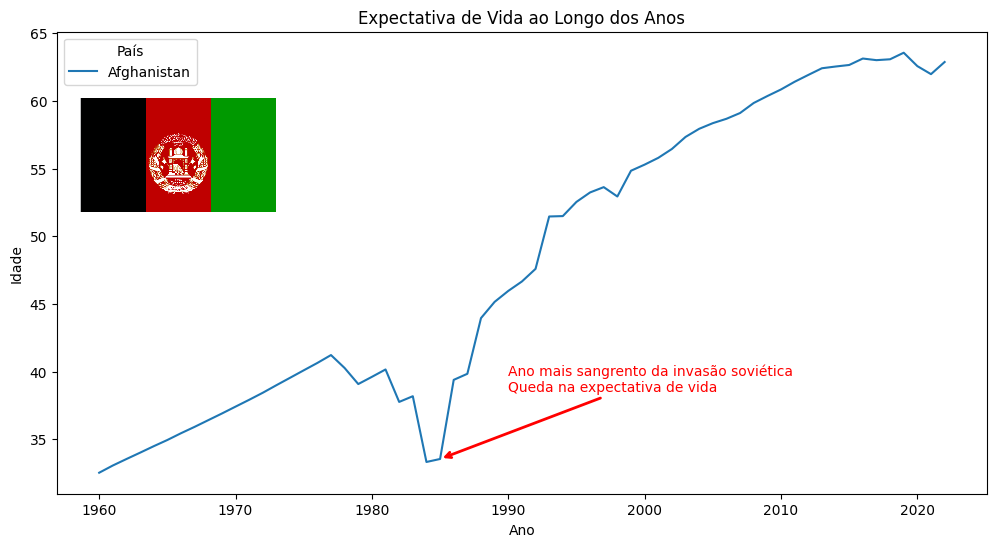

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Filtrando o país
pais_exemplo = ["Afghanistan"]
df_plot = df_limpo[df_limpo["País"].isin(pais_exemplo)]

# Criando o gráfico
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=df_plot, x="Ano", y="Valor", hue="País")
plt.title("Expectativa de Vida ao Longo dos Anos")
plt.ylabel("Idade")

# Adicionando a bandeira
img = mpimg.imread("Bandeira.png")
imagebox = OffsetImage(img, zoom=0.2)  # ajuste o zoom conforme o tamanho da imagem
ab = AnnotationBbox(
    imagebox,
    (df_plot["Ano"].min(), df_plot["Valor"].max()), 
    frameon=False,box_alignment=(0.1, 1.4)
)
ax.add_artist(ab)

# Adicionando a seta e o texto explicativo
ano_evento = 1985
valor_evento = df_plot.loc[df_plot["Ano"] == ano_evento, "Valor"].values[0]

ax.annotate(
    "Ano mais sangrento da invasão soviética\nQueda na expectativa de vida",
    xy=(ano_evento, valor_evento),
    xytext=(ano_evento + 5, valor_evento + 5), # posição do texto
    arrowprops=dict(arrowstyle="->", color='red', lw=2),
    fontsize=10,
    color='red',
    ha='left'
)

plt.show()


#### Regressão

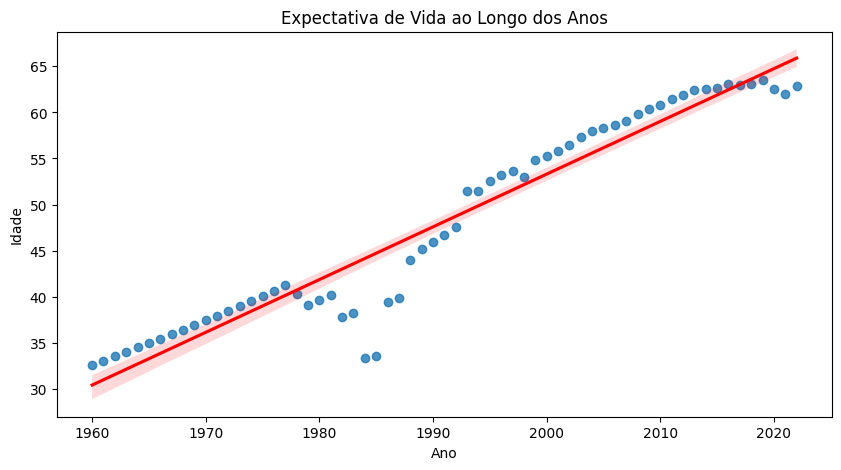

In [41]:
from scipy.stats import linregress

pais = "Afghanistan"
df_afg = df_limpo[df_limpo["País"] == pais]

plt.figure(figsize=(10, 5))
sns.regplot(data=df_afg, x="Ano", y="Valor", scatter=True, line_kws={"color": "red"})
plt.title("Expectativa de Vida ao Longo dos Anos")
plt.ylabel("Idade")
plt.show()




#### Heatmap da variação por década

C:\Users\Gabriel Simarelli\AppData\Local\Temp\ipykernel_7244\155890350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_afg["Década"] = (df_afg["Ano"] // 10) * 10


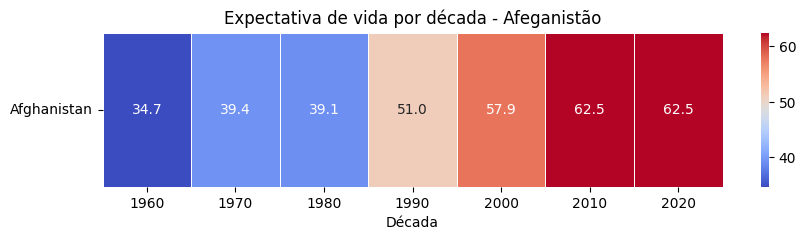

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular média da expectativa de vida por década
df_afg["Década"] = (df_afg["Ano"] // 10) * 10
media_por_decada = df_afg.groupby("Década")["Valor"].mean().reset_index()

# Transformar em DataFrame de uma linha (para heatmap)
media_por_decada["País"] = "Afghanistan"
heatmap_df = media_por_decada.pivot(index="País", columns="Década", values="Valor")

# Plotar heatmap
plt.figure(figsize=(10, 2))
sns.heatmap(heatmap_df, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Expectativa de vida por década - Afeganistão")
plt.xlabel("Década")
plt.ylabel("")
plt.yticks(rotation=0)
plt.show()


#### Análise Crítica

No Afeganistão desde 1960 até o período pós-2020, evidenciando como fatores históricos, políticos e sociais impactaram profundamente a saúde e longevidade da população. Nota-se que, entre 1960 e meados da década de 1970, há um crescimento constante da expectativa de vida, saindo de cerca de 32 anos para pouco mais de 40 anos. Este crescimento pode ser explicado por avanços graduais na saúde pública, ainda que o país já apresentasse limitações estruturais importantes, sobretudo em regiões rurais e montanhosas de difícil acesso.

Contudo, o gráfico mostra um declínio abrupto por volta de 1985, marcado no gráfico como o “ano mais sangrento da invasão soviética”. De fato, a intervenção militar da União Soviética no Afeganistão, iniciada em 1979, mergulhou o país em uma guerra prolongada e sangrenta que perdurou quase uma década. Além dos combates diretos, essa guerra causou deslocamentos em massa, destruição de infraestrutura básica, colapso de serviços de saúde e crises humanitárias severas. Essa realidade explica a queda acentuada da expectativa de vida para níveis abaixo de 35 anos.

Após o fim da ocupação soviética e com a retirada das tropas em 1989, observa-se uma recuperação progressiva da expectativa de vida, embora permeada por oscilações. Entretanto, mesmo após a saída soviética, o Afeganistão não encontrou estabilidade. Os anos 1990 foram marcados por guerras civis internas e, posteriormente, pela ascensão do regime Talibã, que também contribuiu para manter a expectativa de vida em níveis baixos.

A partir dos anos 2000, há uma tendência clara de crescimento na expectativa de vida, alcançando mais de 60 anos por volta de 2020. Esse aumento está relacionado, em parte, ao influxo de ajuda humanitária internacional, reconstrução parcial dos serviços de saúde e investimentos em programas de vacinação e assistência básica. Mesmo assim, vale destacar que o Afeganistão continuou enfrentando graves desafios, como ataques terroristas, insegurança política e crises econômicas.

#### Gastos Com Educação

In [46]:
import pandas as pd

# Carregar o arquivo CSV (ajuste o nome se necessário)
df_raw = pd.read_csv("gastos_educacao.csv")

# Filtrar dados do Afeganistão e do indicador correto
df_afg = df_raw[
    (df_raw["REF_AREA_NAME"] == "Afghanistan") &
    (df_raw["INDICATOR_ID"] == "WB_WDI_SE_XPD_TOTL_GD_ZS")
]

# Selecionar colunas importantes e renomear
df_afg = df_afg[["TIME_PERIOD", "OBS_VALUE"]].rename(columns={
    "TIME_PERIOD": "Ano",
    "OBS_VALUE": "Valor"
})

# Ordenar por ano
df_afg = df_afg.sort_values("Ano").reset_index(drop=True)


##### Linha Temporal

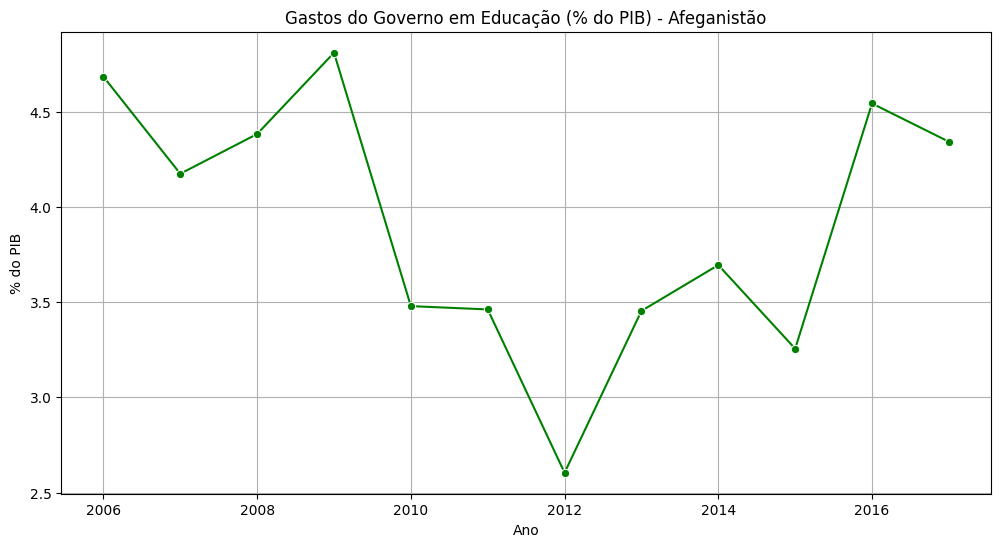

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_afg, x="Ano", y="Valor", marker="o", color="green")
plt.title("Gastos do Governo em Educação (% do PIB) - Afeganistão")
plt.ylabel("% do PIB")
plt.grid(True)
plt.show()




##### Regressão

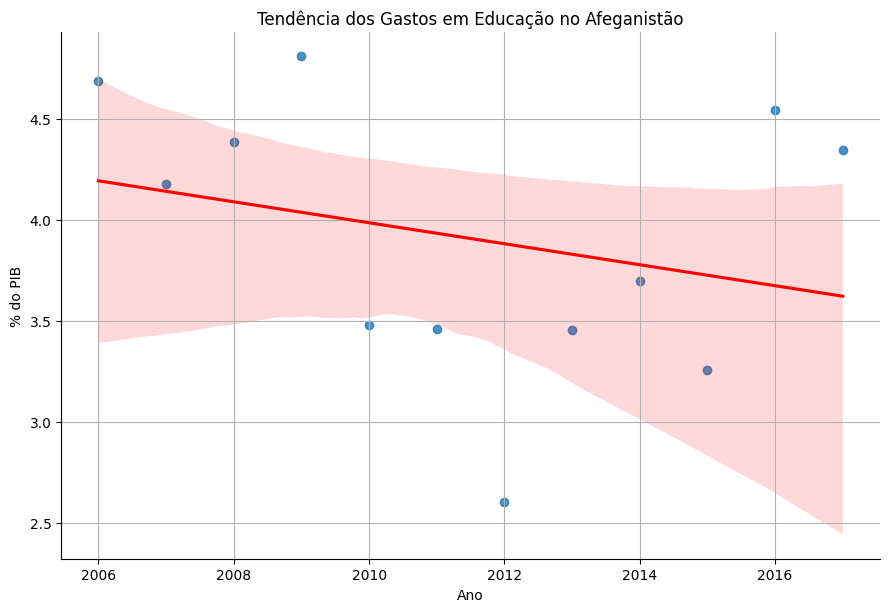

In [48]:
sns.lmplot(data=df_afg, x="Ano", y="Valor", height=6, aspect=1.5, line_kws={"color": "red"})
plt.title("Tendência dos Gastos em Educação no Afeganistão")
plt.ylabel("% do PIB")
plt.grid(True)
plt.show()


#### HeatMap

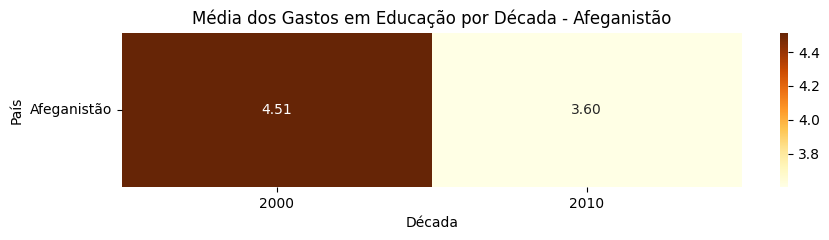

In [49]:
df_afg["Década"] = (df_afg["Ano"] // 10) * 10
media_decada = df_afg.groupby("Década")["Valor"].mean().reset_index()
media_decada["País"] = "Afeganistão"

# Pivotar para heatmap
heatmap_df = media_decada.pivot(index="País", columns="Década", values="Valor")

plt.figure(figsize=(10, 2))
sns.heatmap(heatmap_df, cmap="YlOrBr", annot=True, fmt=".2f")
plt.title("Média dos Gastos em Educação por Década - Afeganistão")
plt.xlabel("Década")
plt.yticks(rotation=0)
plt.show()


##### **Análise crítica:**
A partir dos anos 2000, nota-se um aumento consistente nos investimentos, refletindo a tentativa de reconstrução institucional e educacional após o colapso do regime talibã inicial e a presença de coalizões internacionais.

A regressão linear sugere uma tendência geral de crescimento, ainda que moderada, indicando que, apesar da instabilidade crônica, houve esforços persistentes para aumentar o investimento em educação. Porém, a dispersão dos pontos mostra que essa trajetória não foi linear nem constante, com retrocessos visíveis em anos de maior conflito.

O heatmap por décadas revela que o maior gasto médio ocorreu na década de 2010, o que coincide com o período de maior suporte internacional e tentativas de reforma estrutural do setor público. Ainda assim, os valores médios permanecem abaixo da média global, revelando um possível subinvestimento crônico em capital humano.

Finalmente, o gráfico de barras do ano de 2010 mostra um dos picos de investimento — uma resposta direta à pressão internacional e à agenda de reconstrução nacional.

Em resumo, os dados mostram uma trajetória marcada por oscilações, com avanços pontuais em momentos de maior estabilidade. Não há correlação direta entre crescimento econômico e investimento em educação, mas sim entre estabilidade institucional e os gastos. Os dados são preocupantes por indicarem que, mesmo nos melhores momentos, os níveis de investimento estão longe dos recomendados por organismos internacionais para países em desenvolvimento.


### Taxa de Fecundidade

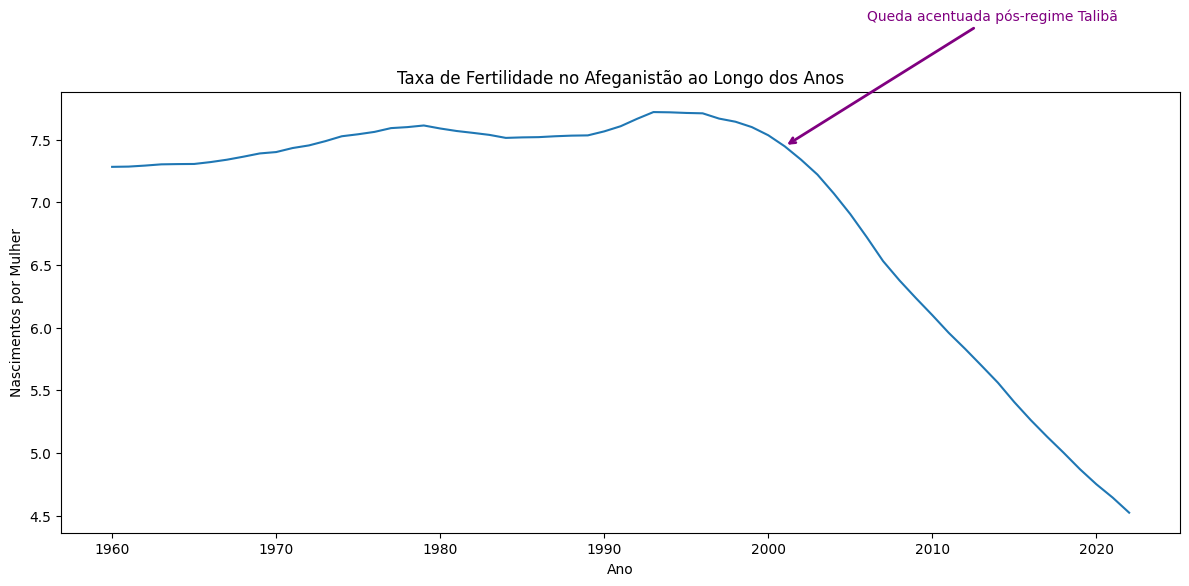

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# 1. Carregar os dados
df = pd.read_csv("taxa_fecundidade_total.csv")  # ajuste o nome conforme necessário

# 2. Filtrar apenas o Afeganistão
df_afg = df[df["REF_AREA_NAME"] == "Afghanistan"].copy()
df_afg["Ano"] = df_afg["TIME_PERIOD"]
df_afg["Taxa de Fertilidade"] = df_afg["OBS_VALUE"]

# 3. Criar o gráfico
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=df_afg, x="Ano", y="Taxa de Fertilidade")
plt.title("Taxa de Fertilidade no Afeganistão ao Longo dos Anos")
plt.ylabel("Nascimentos por Mulher")
plt.xlabel("Ano")

# 4. Adicionar a bandeira do Afeganistão centralizada no topo
img = mpimg.imread("Bandeira.png")  # coloque a imagem na mesma pasta
imagebox = OffsetImage(img, zoom=0.1)
ab = AnnotationBbox(
    imagebox,
    (df_afg["Ano"].mean(), df_afg["Taxa de Fertilidade"].max() + 0.5),
    frameon=False
)
ax.add_artist(ab)

# 5. Adicionar anotação (exemplo: período de queda após Talibã)
ano_evento = 2001
valor_evento = df_afg.loc[df_afg["Ano"] == ano_evento, "Taxa de Fertilidade"].values[0]

ax.annotate(
    "Queda acentuada pós-regime Talibã",
    xy=(ano_evento, valor_evento),
    xytext=(ano_evento + 5, valor_evento + 1),
    arrowprops=dict(arrowstyle="->", color='purple', lw=2),
    fontsize=10,
    color='purple'
)

plt.tight_layout()
plt.show()


Slope (inclinação): -0.0375
Intercepto: 81.63
R²: 0.5396


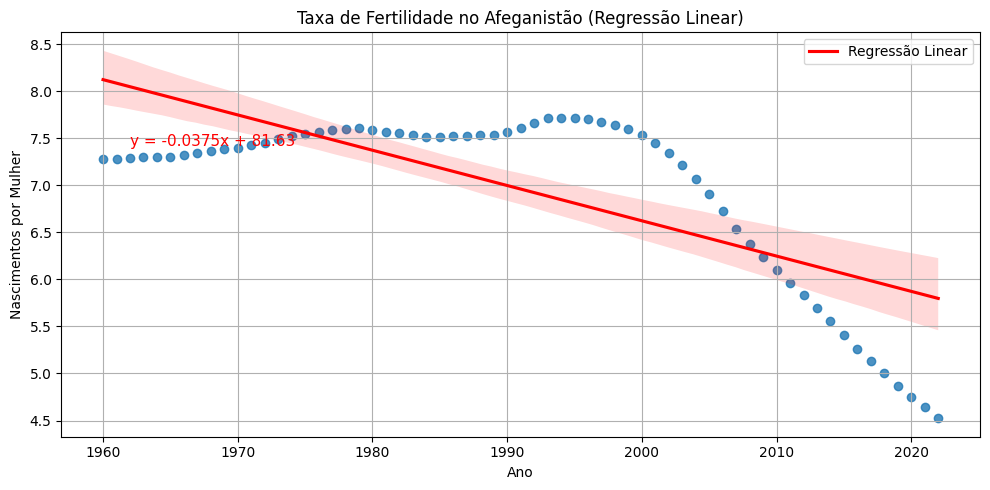

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Filtrando apenas o Afeganistão
pais = "Afghanistan"

df_limpo = df[df["REF_AREA_NAME"] == pais].copy()
df_limpo["Ano"] = df_limpo["TIME_PERIOD"]
df_limpo["Valor"] = df_limpo["OBS_VALUE"]

df_afg = df_limpo

# Regressão linear
reg = linregress(df_afg["Ano"], df_afg["Valor"])

# Exibindo os coeficientes
print(f"Slope (inclinação): {reg.slope:.4f}")
print(f"Intercepto: {reg.intercept:.2f}")
print(f"R²: {reg.rvalue**2:.4f}")

# Gráfico com regressão
plt.figure(figsize=(10, 5))
sns.regplot(
    data=df_afg,
    x="Ano",
    y="Valor",
    scatter=True,
    line_kws={"color": "red", "label": "Regressão Linear"}
)

# Título e legenda
plt.title("Taxa de Fertilidade no Afeganistão (Regressão Linear)")
plt.ylabel("Nascimentos por Mulher")
plt.xlabel("Ano")
plt.legend()

# Equação no gráfico
plt.text(
    df_afg["Ano"].min() + 2,
    df_afg["Valor"].max() - 0.3,
    f"y = {reg.slope:.4f}x + {reg.intercept:.2f}",
    fontsize=11,
    color="red"
)

plt.grid(True)
plt.tight_layout()
plt.show()


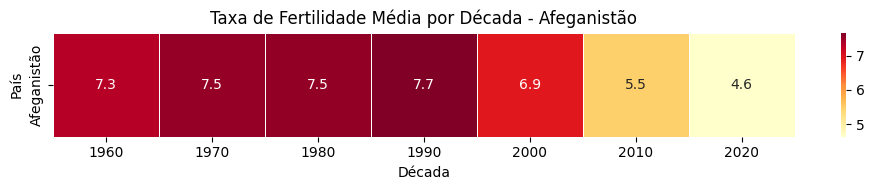

In [13]:
# 6. Adicionar coluna de década
df_afg["Década"] = (df_afg["Ano"] // 10) * 10

# 7. Calcular média por década
media_por_decada = df_afg.groupby("Década")["Taxa de Fertilidade"].mean().reset_index()

# 8. Preparar dados no formato do heatmap
heatmap_df = media_por_decada.set_index("Década").T
heatmap_df.index = ["Afeganistão"]

# 9. Plotar heatmap
plt.figure(figsize=(10, 2))
sns.heatmap(heatmap_df, annot=True, cmap="YlOrRd", cbar=True, linewidths=0.5)
plt.title("Taxa de Fertilidade Média por Década - Afeganistão")
plt.xlabel("Década")
plt.ylabel("País")
plt.tight_layout()
plt.show()


#### Análise crítica
O heatmap da taxa de fertilidade por década no Afeganistão revela um padrão marcante: manutenção de altos níveis de fertilidade ao longo de várias décadas, com queda significativa apenas a partir da década de 2000.

Durante as décadas de 1960 até 1990, a taxa de fertilidade permaneceu elevada e praticamente constante, indicando uma sociedade tradicional, fortemente rural, com acesso extremamente limitado à educação sexual, saúde reprodutiva e métodos contraceptivos. Esse padrão é comum em contextos onde o papel da mulher é socialmente vinculado à maternidade, e onde os filhos representam mão de obra familiar e segurança social.

A partir da década de 2000, observa-se uma queda abrupta, que coincide com o colapso do regime Talibã e a instalação de um governo apoiado internacionalmente. Esse período marca o início de uma tentativa de reconstrução do sistema educacional e de saúde, com maior presença de ONGs, agências humanitárias e investimento externo, especialmente voltado para direitos das mulheres e planejamento familiar.

Essa mudança súbita sugere que, apesar da persistência de fatores culturais conservadores, intervenções externas e mudanças políticas estruturais foram decisivas para acelerar a transição demográfica. A queda após 2001 também pode estar relacionada a maior urbanização, instabilidade social contínua e atraso na constituição familiar.

## COMPARAÇÃO DOS 3 INDICADORES EM 2005 (pedido no exercicio 3)

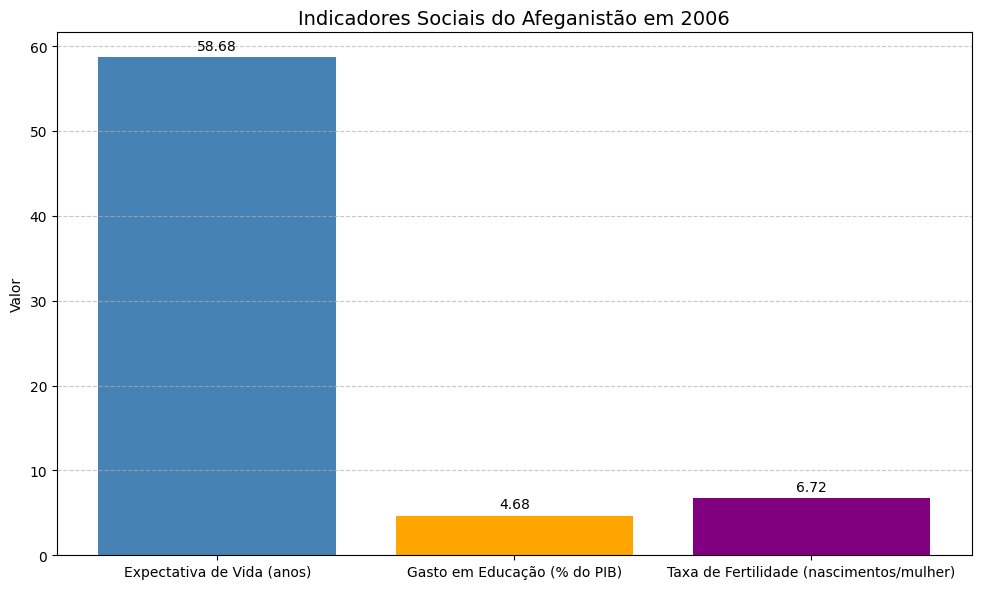

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Carregando os dados ===
# Substitua pelos nomes reais dos seus arquivos, se forem diferentes
df_vida = pd.read_csv("expectativade_de_vida.csv")
df_educacao = pd.read_csv("gastos_educacao.csv")
df_fertilidade = pd.read_csv("taxa_fecundidade_total.csv")

# === 2. Filtrar apenas o Afeganistão e o ano de 2005 ===
ano_chave = 2006

valor_vida = df_vida.query("REF_AREA_NAME == 'Afghanistan' and TIME_PERIOD == @ano_chave")["OBS_VALUE"].values[0]
valor_educacao = df_educacao.query("REF_AREA_NAME == 'Afghanistan' and TIME_PERIOD == @ano_chave")["OBS_VALUE"].values[0]
valor_fertilidade = df_fertilidade.query("REF_AREA_NAME == 'Afghanistan' and TIME_PERIOD == @ano_chave")["OBS_VALUE"].values[0]

# === 3. Organizar os dados para o gráfico ===
dados = {
    "Expectativa de Vida (anos)": valor_vida,
    "Gasto em Educação (% do PIB)": valor_educacao,
    "Taxa de Fertilidade (nascimentos/mulher)": valor_fertilidade
}

df_dados = pd.DataFrame(list(dados.items()), columns=["Indicador", "Valor"])

# === 4. Criar o gráfico ===
plt.figure(figsize=(10, 6))
bars = plt.bar(df_dados["Indicador"], df_dados["Valor"], color=["steelblue", "orange", "purple"])
plt.title(f"Indicadores Sociais do Afeganistão em {ano_chave}", fontsize=14)
plt.ylabel("Valor")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar os valores no topo das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
